# Loading CSV

In [2]:
import csv

measurements = ['sepal lenght','sepal width', 'petal lenght', 'petal width']
iris_dataset = [[],[],[],[],[]]
with open("dataset/iris.data") as f:
    print(f.read(100))
    for row in csv.reader(f):
        if len(row)== 5:
            for i in range(4):
                iris_dataset[i].append(float(row[i]))
            iris_dataset[4].append(row[4])
            

print(len(iris_dataset))


5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,
5


### Function

In [2]:
from math import sqrt

def mean(input_list):
   
    return (sum(input_list)/len(input_list))

def st_dev(input_list, mean_list):
    return sqrt(mean([(x-mean_list)**2 for x in input_list]))
    #return sqrt((1/len(input_list))*sum((x-mean_list)**2 for x in input_list))
        

### 2- Caclulate mean, stdev

In [3]:
for i, m in enumerate(measurements):
    print(f"{m}: [mean: {mean(iris_dataset[i]):.4f}, stdev: {st_dev(iris_dataset[i], mean(iris_dataset[i])):.4f}]")

sepal lenght: [mean: 5.8433, stdev: 0.8253]
sepal width: [mean: 3.0540, stdev: 0.4321]
petal lenght: [mean: 3.7587, stdev: 1.7585]
petal width: [mean: 1.1987, stdev: 0.7606]


### 2- Caclulate mean, stdev for each type

In [4]:
iris_types = set(iris_dataset[4])
#for each measure
for i, m in enumerate(measurements):
    print(m)
    #for each type
    for iris_type in iris_types:
        #creating a list of values v of the column i (specific param), groupped by iris_type
        values = [v for v,t in zip(iris_dataset[i], iris_dataset[4]) if iris_type == t]
        print(f"{iris_type}: {mean(values):.4f} {st_dev(values, mean(values)):.4f}")

sepal lenght
Iris-setosa: 5.0060 0.3489
Iris-virginica: 6.5880 0.6295
Iris-versicolor: 5.9360 0.5110
sepal width
Iris-setosa: 3.4180 0.3772
Iris-virginica: 2.9740 0.3193
Iris-versicolor: 2.7700 0.3106
petal lenght
Iris-setosa: 1.4640 0.1718
Iris-virginica: 5.5520 0.5463
Iris-versicolor: 4.2600 0.4652
petal width
Iris-setosa: 0.2440 0.1061
Iris-virginica: 2.0260 0.2719
Iris-versicolor: 1.3260 0.1958


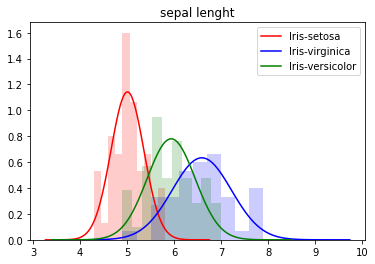

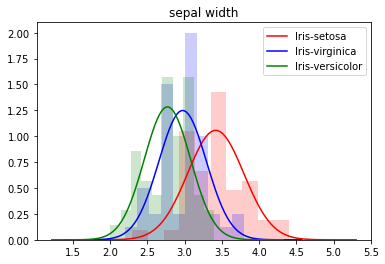

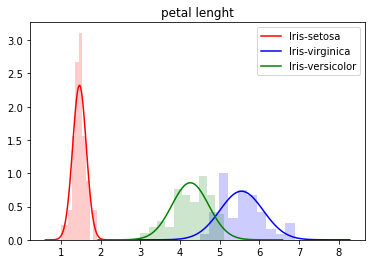

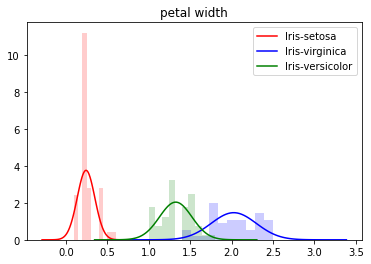

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np


colors =['r', 'b', 'g']

for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    #for each measure and irisType, I associate a color and a function that would be plotted in the same figure
    for iris_type, color in zip(iris_types, colors):
        values = [v for v, t in zip(iris_dataset[i], iris_dataset[4]) if t == iris_type]
        plt.hist(values, density = True, alpha= 0.2, color = color)
        u = mean(values)
        s = st_dev(values, u)
        x = np.linspace(u-5*s, u+5*s, 100)
        plt.plot(x,norm(u,s).pdf(x), label = iris_type, color = color)
    plt.legend()


### 4 - Fit new flowers


1st flower could be a Versicolor, 2nd could be a Virginica and the 3rd a Setosa --> Just watching the previous result
This could be implemented for each flower and plot them or for the whole group.

In [6]:
new_flowers = [[5.2, 3.1, 4.0, 1.2],
                [4.9, 2.5, 5.6, 2.0],
                [5.4, 3.2, 1.9, 0.4]]
dictionary = {}
for i, m in enumerate(measurements):
    values = []
    for row in new_flowers:
        values.append(float(row[i]))
    dictionary[m] = [mean(values), st_dev(values, mean(values))]

    
#dictionary['sepal lenght'][0]
dictionary

{'sepal lenght': [5.166666666666667, 0.20548046676563253],
 'sepal width': [2.9333333333333336, 0.30912061651652356],
 'petal lenght': [3.8333333333333335, 1.5151090903151347],
 'petal width': [1.2, 0.6531972647421809]}

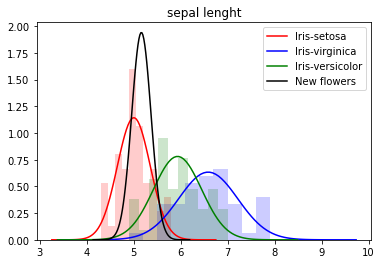

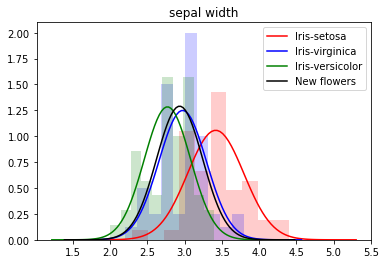

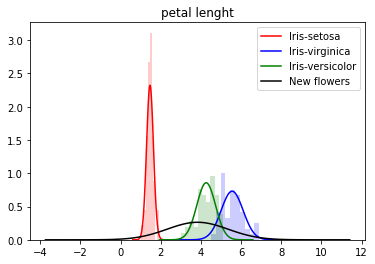

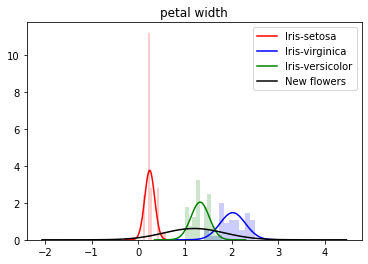

In [7]:
colors =['r', 'b', 'g']

for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    #for each measure and irisType, I associate a color and a function that would be plotted in the same figure
    for iris_type, color in zip(iris_types, colors):
        values = [v for v, t in zip(iris_dataset[i], iris_dataset[4]) if t == iris_type]
        plt.hist(values, density = True, alpha= 0.2, color = color)
        u = mean(values)
        s = st_dev(values, u)
        x = np.linspace(u-5*s, u+5*s, 100)
        plt.plot(x,norm(u,s).pdf(x), label = iris_type, color = color)
    
    
    
    #for the new flowers
    u = dictionary[m][0]
    s = dictionary[m][1]
    y = np.linspace(u-5*s, u+5*s,100)
    plt.plot(y, norm(u,s).pdf(y), label = 'New flowers', color = 'black')
    plt.legend()